#### TEMPLATE MATCHING:

Simplest Form of Object Detection:
(Looks or searches for exact copy of image within other Large image.)

 This is done by sliding the target template image across large image.

(has to be exact match)-so target template is subset of large image.

OpenCV methods used are:

1. SQUARED DIFFERENCE

2. NORMALIZED SQUARED DIFFERENCE

3. CORRELATION COEFFICIENTS

...

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
full_image_bgr = cv2.imread('Data/sammy.jpg')

full_image_rgb = cv2.cvtColor(full_image_bgr, cv2.COLOR_BGR2RGB)



In [3]:
def display_img(img):
    fig=plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.imshow(img)
    plt.show()
    plt.close()

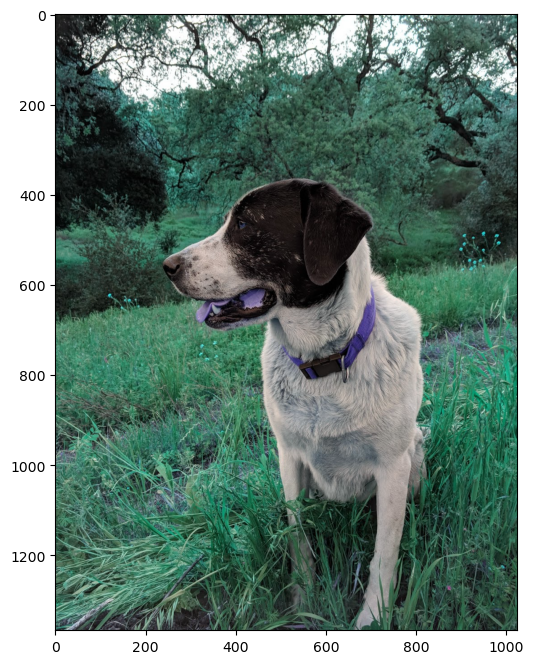

In [4]:
display_img(full_image_bgr)

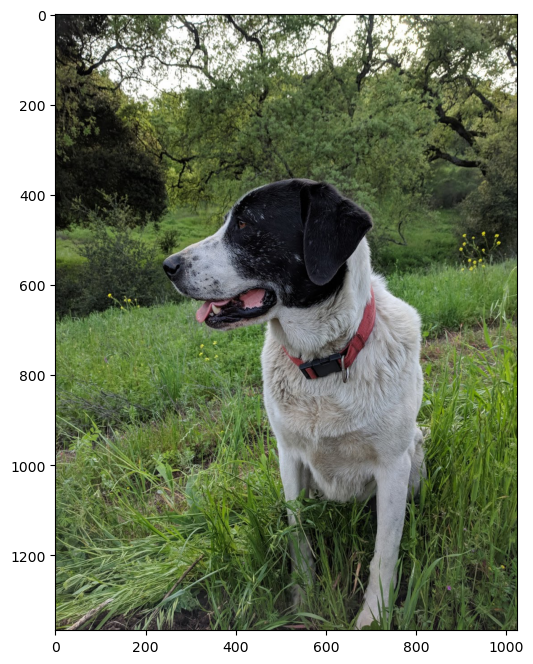

In [5]:
display_img(full_image_rgb)

In [6]:
target_image_bgr = cv2.imread('Data/sammy_face.jpg')

target_image_rgb = cv2.cvtColor(target_image_bgr, cv2.COLOR_BGR2RGB)


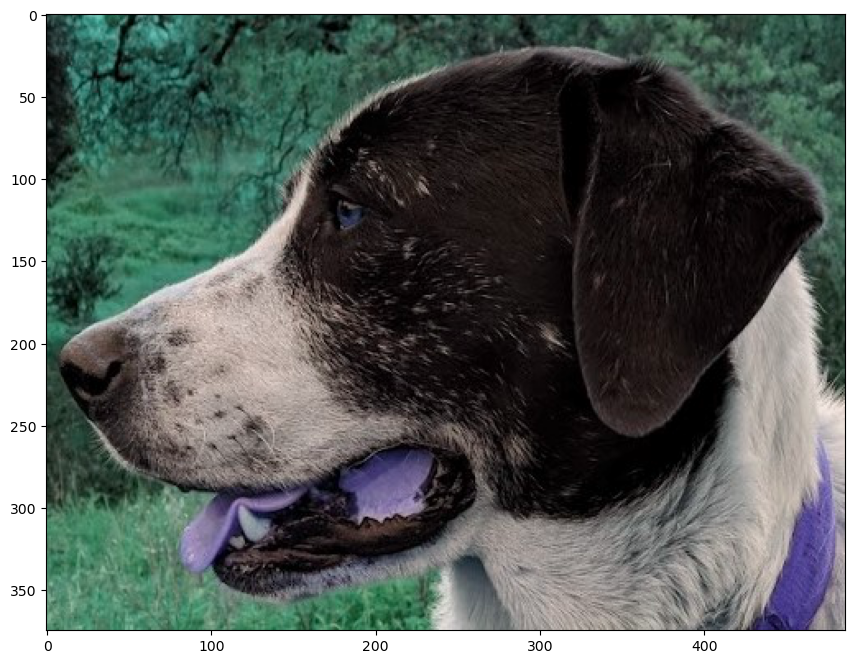

In [7]:
display_img(target_image_bgr)

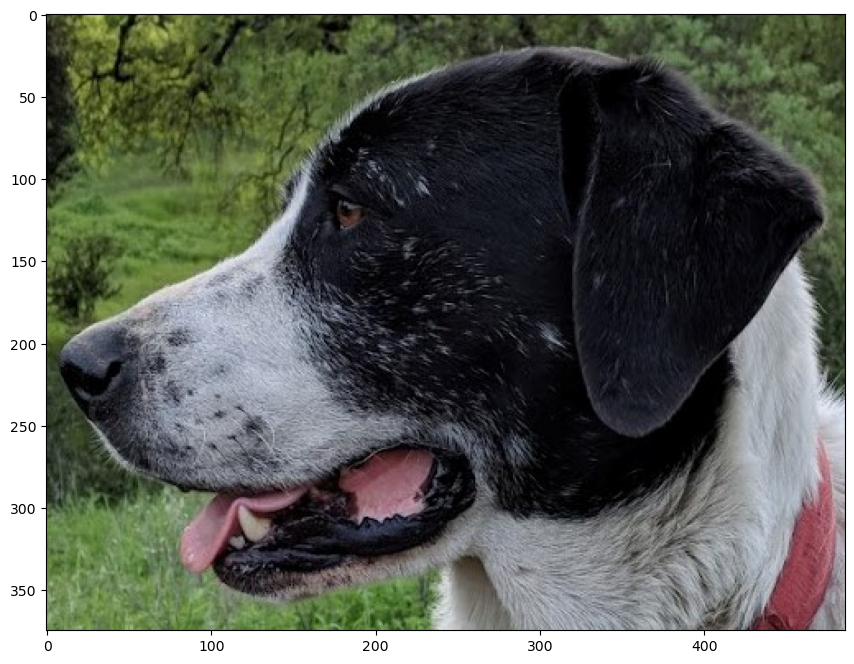

In [8]:
display_img(target_image_rgb)

In [9]:
full_image_rgb.shape

(1367, 1025, 3)

In [10]:
target_image_rgb.shape

(375, 486, 3)

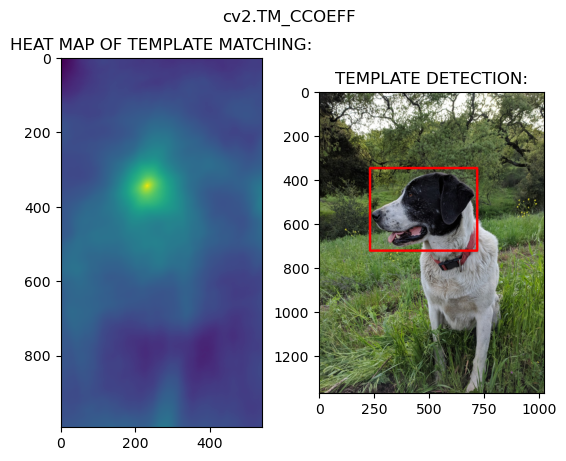

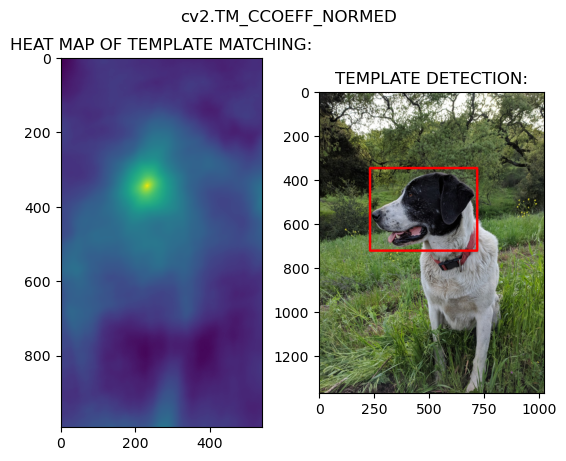

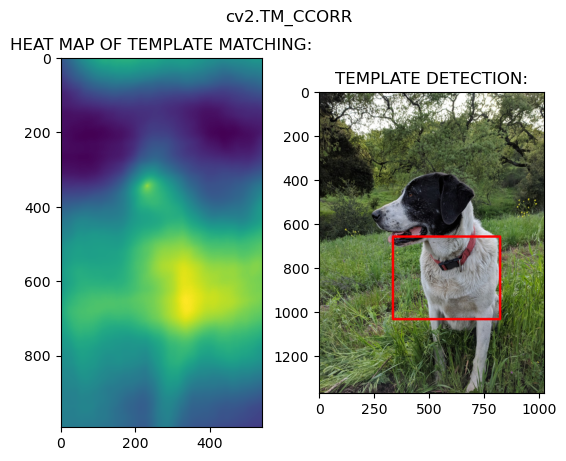

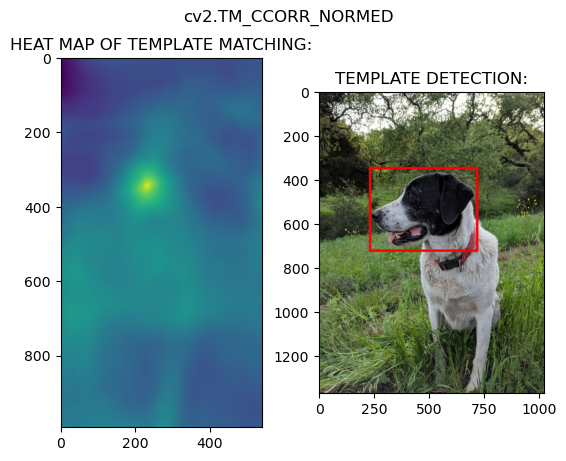

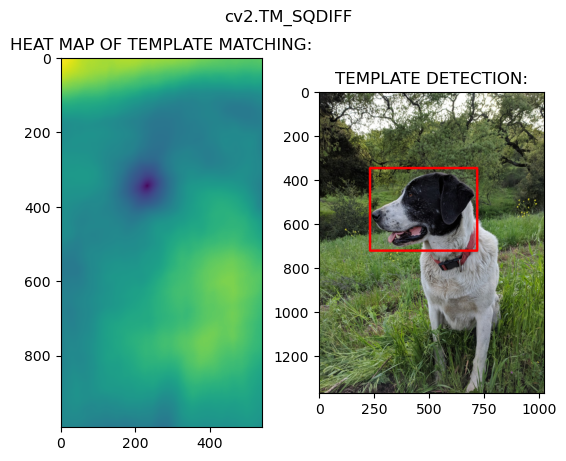

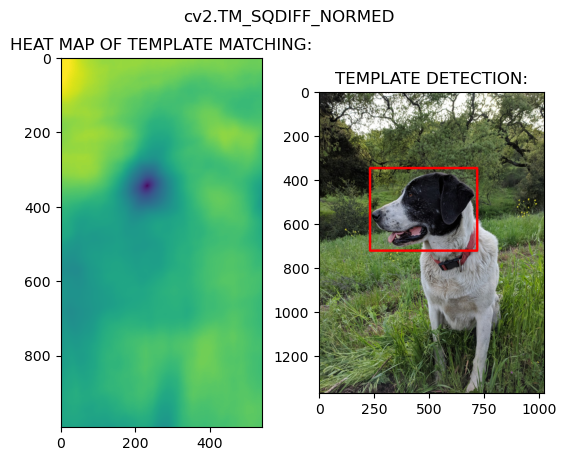

In [11]:
#template matching - this is a simplest form of object detection.

#eval function - used to evaluate string values (as a function call)

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

#these are list of methods used in opencv for comparision in template matching.

for met in methods:
    #gettoing a copy of large image:
    full_image_copy = full_image_rgb.copy()
    method_now = eval(met)

    #template matching:(res_map is a heat map where there is high correlation it brightens there) except sqdiff and sqdiff_normed
    res_map = cv2.matchTemplate(full_image_copy, target_image_rgb, method_now)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res_map)
    #tuple unpacking of getting min and max values from heat map
    if method_now in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc #x,y topleft corner of rectangle is min value
    else:
        top_left = max_loc #for other methods top left (max brighness)

    height, width, channels=target_image_rgb.shape
    #height and width of rectangle

    bottom_right = (top_left[0]+width, top_left[1]+height)
    cv2.rectangle(full_image_copy, top_left, bottom_right, (255,0,0), 10)

    plt.subplot(121)
    plt.imshow(res_map)
    plt.title("HEAT MAP OF TEMPLATE MATCHING:")

    plt.subplot(122)
    plt.imshow(full_image_copy)
    plt.title("TEMPLATE DETECTION:")

    plt.suptitle(met)
    
    plt.show()
    print("\n")
    print("\n")
plt.close()